In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

PROBABILITY_HEADS = 0.4
GOAL = 100
STATES = np.arange(GOAL + 1)
EPSILON = 1e-09
GAMMA = 1


def actions(state):
    """The actions available at a given state.
    """
    return np.arange(min(state, GOAL - state) + 1)


def reward(s):
    """Reward at a given state.
    """
    if s == 100:
        return 1
    return 0


def sigma(state_value, state):
    """A list of each sum in the max and argmax of the algorithm, page 67.
    """
    action_value = []
    for action in actions(state):
        action_value.append(
            PROBABILITY_HEADS * (reward(state + action) + GAMMA * state_value[state + action]) + 
            (1 - PROBABILITY_HEADS) * (reward(state - action) + GAMMA * state_value[state - action])
        )
    return np.array(action_value)


def optimal_policy(state_value, state, without_zero_action=False):
    """Use the state and state_value to infer the optimal policy.
    
    The without_zero_action drops the 0 action, e.g. action of not betting,
    and rounds to 5th decimal. This was seemingly done in the example in
    the book.
    """
    if without_zero_action:
        return np.argmax(np.round(sigma(state_value, state), 5)[1:]) + 1
    return np.argmax(sigma(state_value, state))


def value_iteration_example():
    """Do the value iteration for the example.
    """

    # Initialize states.
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0
    
    # Calculate the value function.
    while True:
        old_state_value = state_value.copy()
        for state in STATES[1:-1]:
            state_value[state] = np.max(sigma(state_value, state))

        delta = abs(old_state_value - state_value).max()
        if delta < EPSILON:
            break

    # Calculate the policy function.
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:-1]:
        policy[state] = optimal_policy(state_value, state, without_zero_action=True)
        
    # Take the subset of states {1, ... , 99}
    state_value = state_value[1:-1]
    policy = policy[1:-1]

    return state_value, policy

# Run the algorithm

In [2]:
state_value, policy = value_iteration_example()

In [3]:
np.round(state_value, 4)

array([0.0041, 0.0103, 0.0185, 0.0258, 0.0348, 0.0461, 0.0556, 0.0646,
       0.0754, 0.0869, 0.1007, 0.1153, 0.1305, 0.1391, 0.1489, 0.1614,
       0.1732, 0.1884, 0.2063, 0.2173, 0.2319, 0.2518, 0.2672, 0.2883,
       0.32  , 0.3262, 0.3355, 0.3477, 0.3587, 0.3722, 0.3892, 0.4034,
       0.4168, 0.4331, 0.4504, 0.4711, 0.493 , 0.5157, 0.5286, 0.5433,
       0.5621, 0.5798, 0.6026, 0.6294, 0.646 , 0.6679, 0.6977, 0.7207,
       0.7524, 0.8   , 0.8062, 0.8155, 0.8277, 0.8387, 0.8522, 0.8692,
       0.8834, 0.8968, 0.9131, 0.9304, 0.9511, 0.973 , 0.9957, 1.0086,
       1.0233, 1.0421, 1.0598, 1.0826, 1.1094, 1.126 , 1.1479, 1.1777,
       1.2007, 1.2324, 1.28  , 1.2893, 1.3032, 1.3215, 1.3381, 1.3582,
       1.3838, 1.4052, 1.4252, 1.4496, 1.4756, 1.5066, 1.5395, 1.5736,
       1.5929, 1.6149, 1.6431, 1.6697, 1.704 , 1.7441, 1.769 , 1.8018,
       1.8465, 1.8811, 1.9287])

In [4]:
policy

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12.,
       11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11.,
       10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 50.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 25.,  1.,  2.,  3.,
        4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,  9.,
        8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

# Visualize

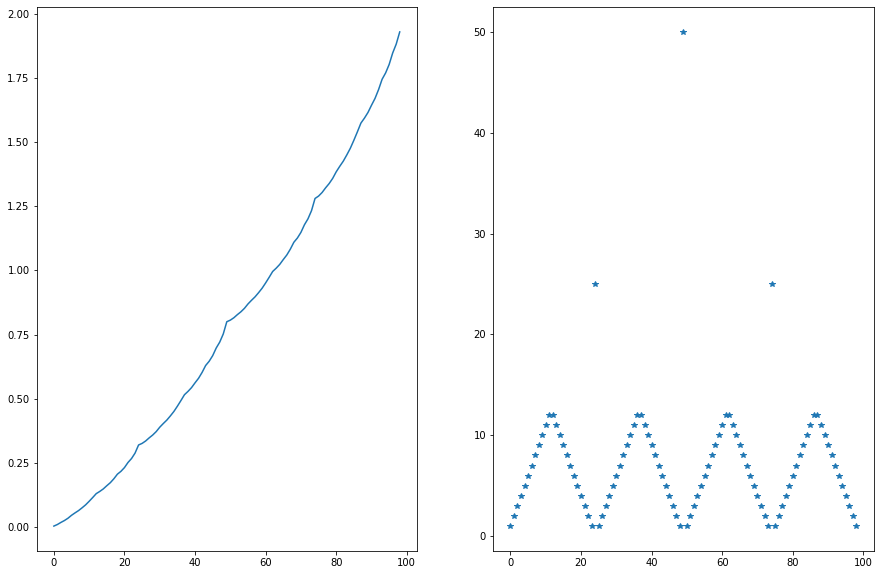

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(state_value)
plt.subplot(122)
plt.plot(policy, '*')

# Tests

In [41]:
assert actions(0) == [0], 'State 100 should be a recurrent state.'
assert actions(100) == [0], 'State 100 should be a recurrent state.'

# Test `actions()` and 
for s in STATES:
    assert 0 in actions(s), '0 is always and action.'
    for a in actions(s):
        assert 0 <= a <= GOAL, 'The new state should be one of 0, ..., len(STATES).'
            

# Test `value_iteration_example()`.
state_value, policy = value_iteration_example()
assert state_value[0] == 0
assert state_value[100] == 1
assert all([0<=v<=1 for v in state_value]), 'The expected value cannot be bigger than 1.'

AssertionError: 